In [18]:
import pandas as pd
import jieba
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import string

In [30]:
inputfile = 'company_properties.xls'
outputfile = 'company_properties_analysis.txt'
data = pd.read_excel(inputfile,encoding='utf-8')
data = data[u'BusinessScope'][data[u'IndustryName'] == u'房地产业']
data.to_csv(outputfile, index = False, header = False)

In [14]:
def remove_punc(text):
    exclude = set(string.punctuation)
    return ''.join(ch for ch in text if ch not in exclude)

In [31]:
# 结巴中文分词
segment_jieba = lambda text: " ".join(jieba.cut(text))

'''
加载语料
'''
corpus = []
with open(outputfile, "r", encoding="utf-8") as f:
    for line in f:
        # 去掉标点符号
        corpus.append(segment_jieba(remove_punc(line.strip())))     

In [33]:
'''
计算tf-idf设为权重
'''

vectorizer = CountVectorizer()
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(vectorizer.fit_transform(corpus))

''' 
获取词袋模型中的所有词语特征
如果特征数量非常多的情况下可以按照权重降维
'''

word = vectorizer.get_feature_names()
print("word feature length: {}".format(len(word)))

''' 
导出权重，到这边就实现了将文字向量化的过程，矩阵中的每一行就是一个文档的向量表示
'''
tfidf_weight = tfidf.toarray()

word feature length: 1627


In [21]:
'''
对向量进行聚类
'''

# 指定分成7个类
kmeans = KMeans(n_clusters=7)
kmeans.fit(tfidf_weight)

# 打印出各个族的中心点
print(kmeans.cluster_centers_)
for index, label in enumerate(kmeans.labels_, 1):
    print("index: {}, label: {}".format(index, label))

# 样本距其最近的聚类中心的平方距离之和，用来评判分类的准确度，值越小越好
# k-means的超参数n_clusters可以通过该值来评估
print("inertia: {}".format(kmeans.inertia_))

[[ 2.81892565e-18  5.42101086e-19 -7.04731412e-19 ... -1.62630326e-19
   6.81816616e-04  3.79470760e-19]
 [ 5.99311688e-03  5.42101086e-19  3.56472337e-03 ... -1.49077799e-19
   1.91340322e-03  1.18940212e-03]
 [-3.90312782e-18  8.08478800e-04 -2.76471554e-18 ...  2.22561301e-04
   1.40946282e-18 -2.16840434e-19]
 ...
 [ 3.25260652e-19  2.71050543e-19 -7.58941521e-19 ...  5.42101086e-20
  -6.50521303e-19 -1.08420217e-19]
 [-1.08420217e-19  2.16840434e-19 -7.04731412e-19 ...  1.35525272e-19
  -5.42101086e-19 -1.08420217e-19]
 [ 1.51788304e-18  4.33680869e-19 -9.21571847e-19 ... -4.06575815e-20
  -3.79470760e-19 -2.71050543e-20]]
index: 1, label: 4
index: 2, label: 4
index: 3, label: 4
index: 4, label: 4
index: 5, label: 4
index: 6, label: 4
index: 7, label: 4
index: 8, label: 4
index: 9, label: 4
index: 10, label: 4
index: 11, label: 4
index: 12, label: 4
index: 13, label: 4
index: 14, label: 4
index: 15, label: 4
index: 16, label: 4
index: 17, label: 4
index: 18, label: 2
index: 19, la

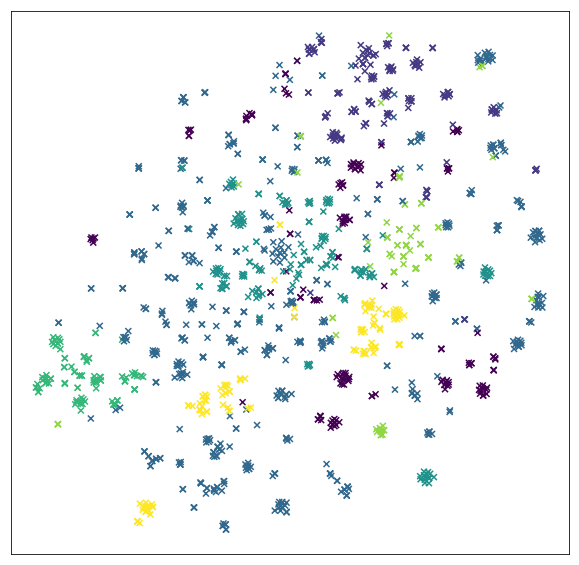

In [28]:
'''
   可视化
'''

# 使用T-SNE算法，对权重进行降维，准确度比PCA算法高，但是耗时长
tsne = TSNE(n_components=2)
decomposition_data = tsne.fit_transform(tfidf_weight)

x = []
y = []

for i in decomposition_data:
    x.append(i[0])
    y.append(i[1])

fig = plt.figure(figsize=(10, 10))
ax = plt.axes()
plt.scatter(x, y, c=kmeans.labels_, marker="x")
plt.xticks(())
plt.yticks(())
plt.show()
#plt.savefig('sample.png', aspect=1)

In [78]:
resultfile='result.xls'
r1 = pd.Series(kmeans.labels_).value_counts()
r2 = pd.DataFrame(kmeans.cluster_centers_)
r = pd.concat([r2,r1], axis = 1)
r = pd.concat([data, pd.Series(kmeans.labels_[:1373],index = data.index)], axis = 1)
r.to_excel(resultfile)